# The purpose of this project was to learn Random forest machine learning model and its application on a dataset

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np

# Importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the required statistical libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

#Importing the machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import optuna

In [2]:
df = pd.read_csv('Lowes E-commerce.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [4]:
df.shape

(500, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


From the above table it's clear that the data is normally distributed for most of the variables but for yearly amount spent there seems to be a longer tail towards the right. 

# Exploratory Data Analysis

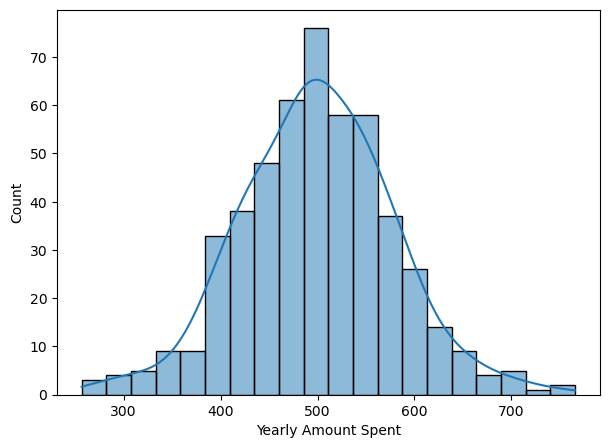

In [7]:
plt.figure(figsize=(7,5))
sns.histplot(x=df['Yearly Amount Spent'], data=df, kde=True)
plt.show()

/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_19467/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

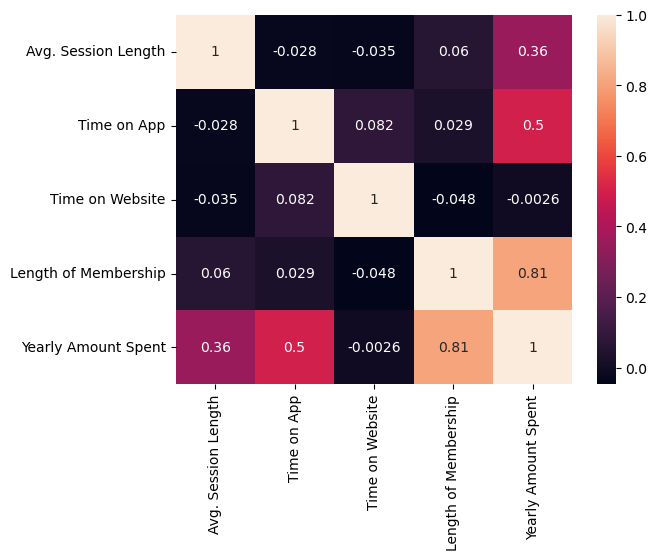

In [8]:
sns.heatmap(df.corr(), annot=True)

1. The length of membership and the yearly amount spent seems to be highly co-related. 
2. Time on website has a negligible negative correlation of -0.0026 and due to its nature we can drop it.

In [9]:
# Dropping the columns that are not relevant for our analysis
df = df.drop(['Email', 'Address', 'Avatar', 'Time on Website'], axis=1)
df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


In [10]:
df.shape

(500, 4)

In [11]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; p

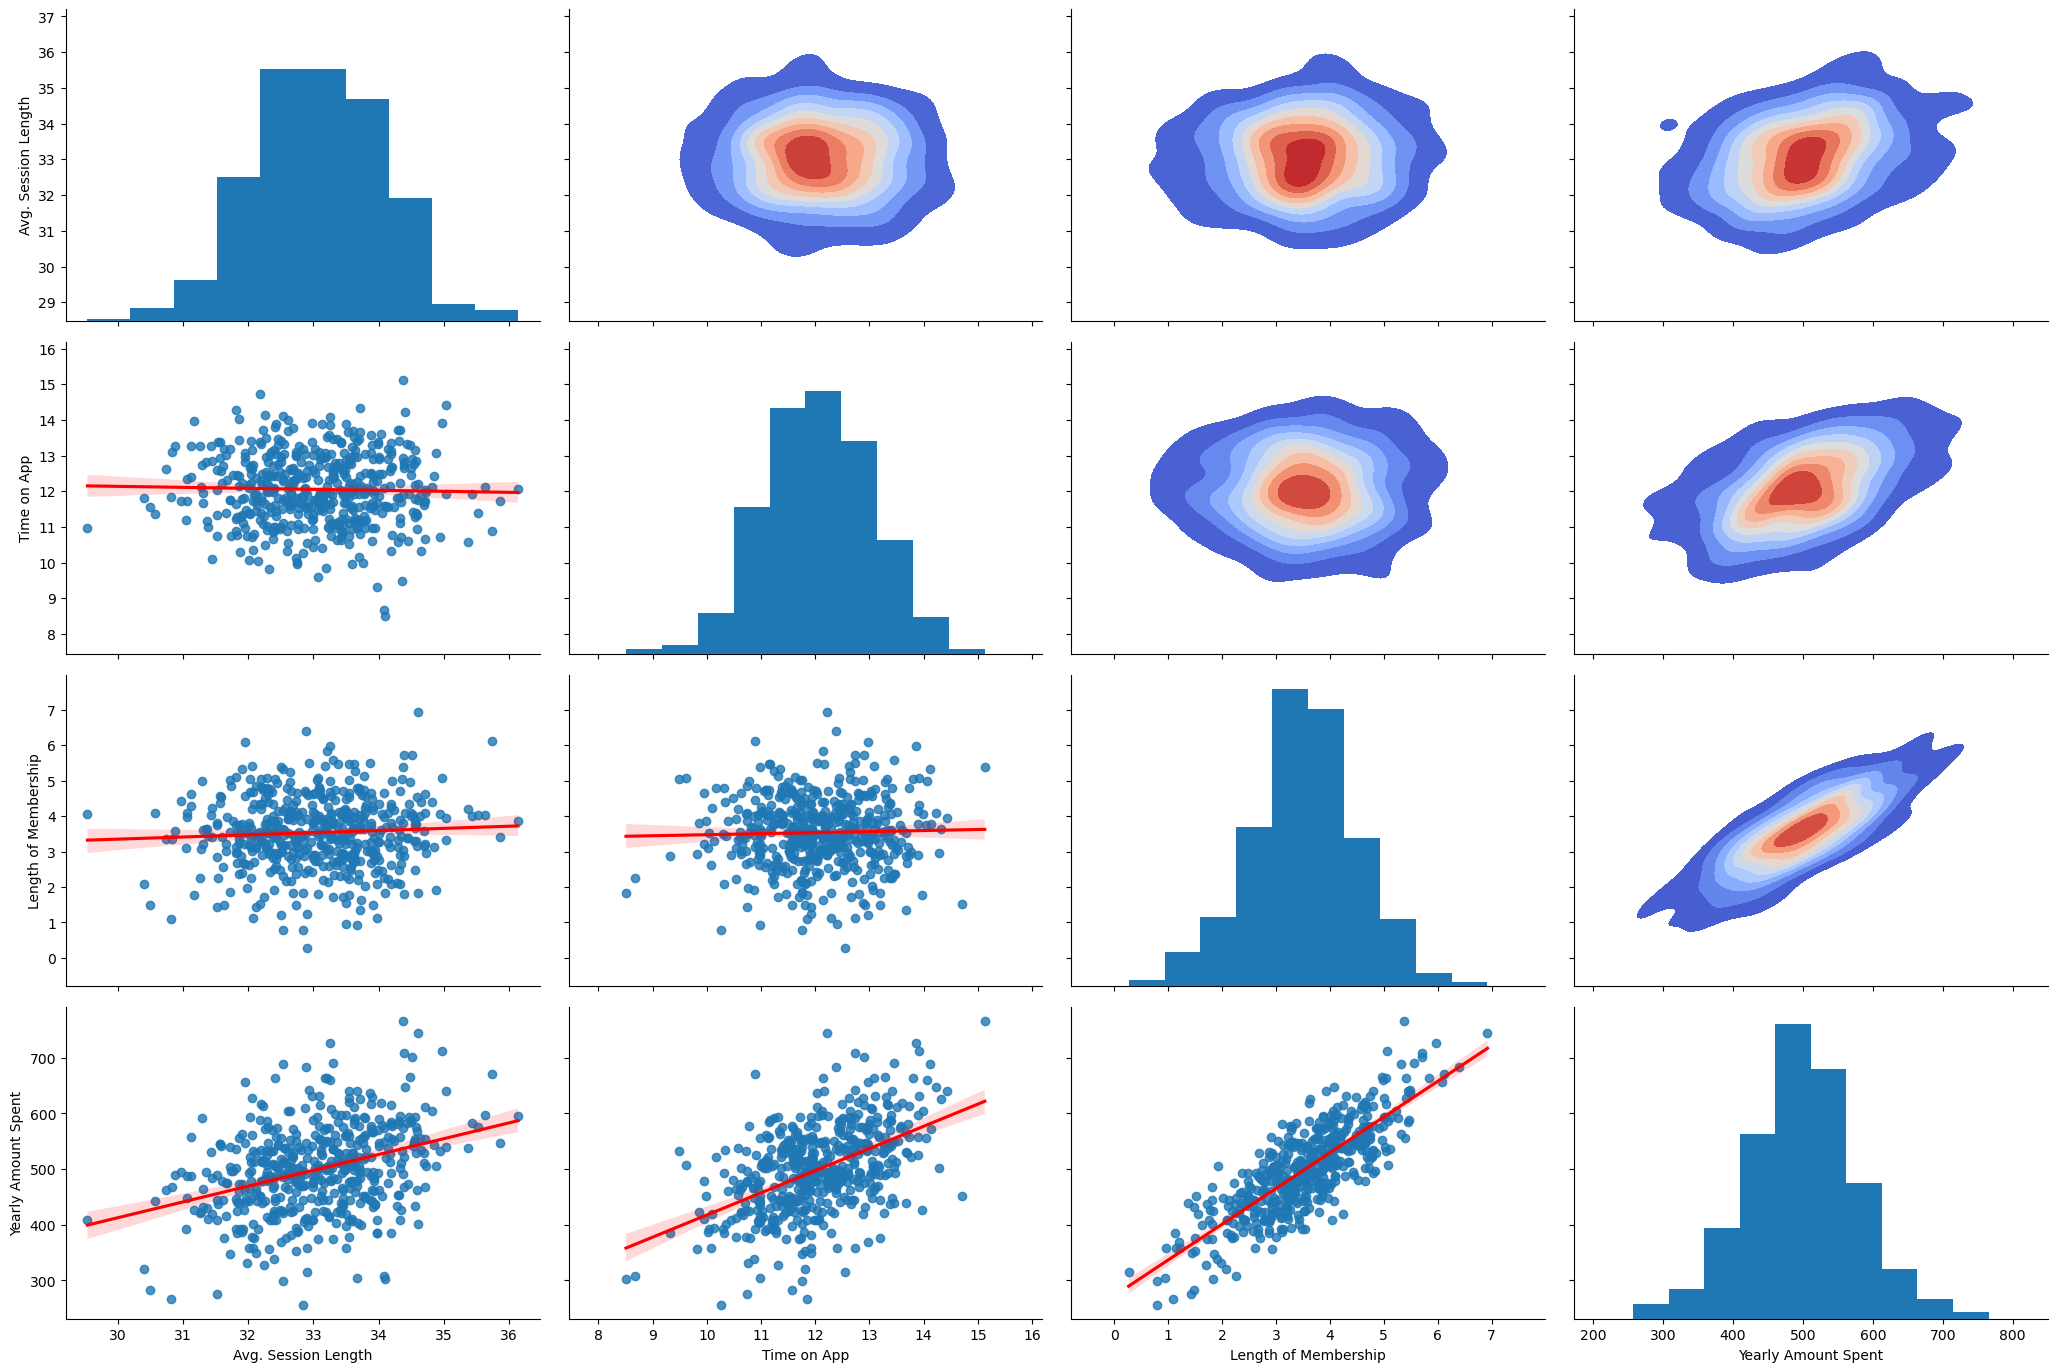

In [12]:
grid = sns.PairGrid(df, vars=['Avg. Session Length', 'Time on App', 'Length of Membership', 'Yearly Amount Spent'],
                   height=3.5, aspect=1.5)
grid = grid.map_diag(plt.hist)

grid = grid.map_lower(sns.regplot, line_kws={'color':'red'})
grid = grid.map_upper(sns.kdeplot, shade=True, cmap='coolwarm')

plt.show()

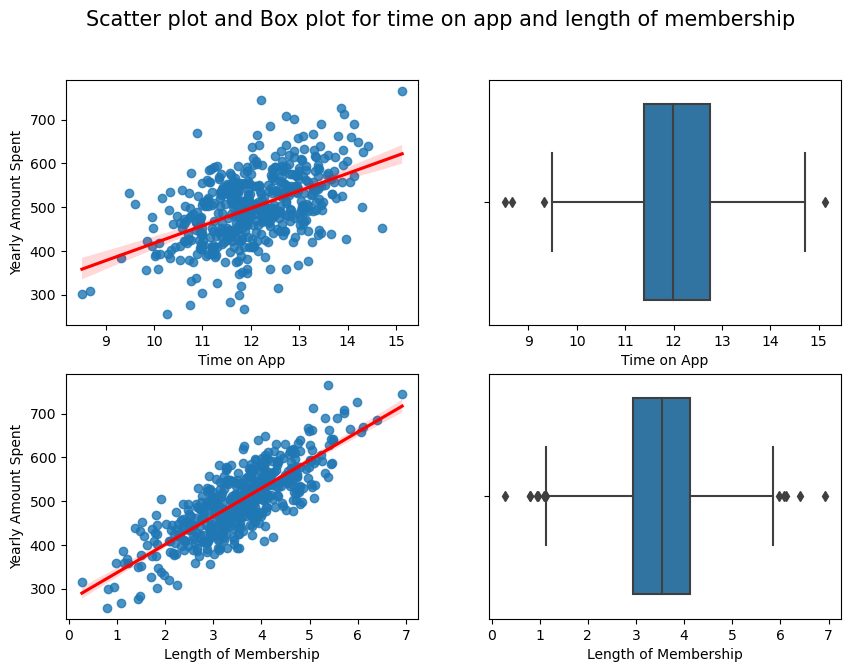

In [13]:
fig, axs = plt.subplots(2,2, figsize=(10,7))
plt.suptitle('Scatter plot and Box plot for time on app and length of membership', fontsize=15)

sns.regplot(x=df['Time on App'], y=df['Yearly Amount Spent'], line_kws={'color':'red'}, ax=axs[0,0])
sns.boxplot(x=df['Time on App'], ax=axs[0,1])

sns.regplot(x=df['Length of Membership'], y=df['Yearly Amount Spent'], line_kws={'color':'red'}, ax=axs[1,0])
sns.boxplot(x=df['Length of Membership'], ax=axs[1,1])

plt.show()

In [14]:
#Creating a copy of the original df

df1 = df.copy()

# Scaling and Splitting

In [15]:
# Yearly amount spent is an important variable so lets drop it on x axis and keep only that variable on the y axis

x = df1.drop(['Yearly Amount Spent'], axis=1)
y = df1['Yearly Amount Spent']

In [16]:
# Lets scale the data for optimal results

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [17]:
# Lets keep the test size to 0.2 and start the random initilization at 42

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
kf = KFold(n_splits=2)

# Random Forest

In [ ]:
# Establishing parameters in the random forest model

def random_forest_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 600)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    model = RandomForestRegressor(
    n_estimators = n_estimators,
    max_depth = max_depth,
    bootstrap= bootstrap
    )
    
    model.fit(X_train, y_train)
    cv_score = - cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    
    return np.mean(cv_score)

study = optuna.create_study(direction = 'minimize')
study.optimize(random_forest_objective, n_trials=10)

[I 2023-06-02 13:19:30,032] A new study created in memory with name: no-name-18fe533b-8e2a-490e-943d-69b8f7d8a3a7
[I 2023-06-02 13:19:31,291] Trial 0 finished with value: 509.23455422964656 and parameters: {'n_estimators': 352, 'max_depth': 16, 'bootstrap': True}. Best is trial 0 with value: 509.23455422964656.
[I 2023-06-02 13:19:32,930] Trial 1 finished with value: 505.146559822874 and parameters: {'n_estimators': 467, 'max_depth': 31, 'bootstrap': True}. Best is trial 1 with value: 505.146559822874.
[I 2023-06-02 13:19:33,485] Trial 2 finished with value: 508.3989298203586 and parameters: {'n_estimators': 157, 'max_depth': 10, 'bootstrap': True}. Best is trial 1 with value: 505.146559822874.
[I 2023-06-02 13:19:35,269] Trial 3 finished with value: 512.7620107346643 and parameters: {'n_estimators': 506, 'max_depth': 34, 'bootstrap': True}. Best is trial 1 with value: 505.146559822874.
[I 2023-06-02 13:19:36,735] Trial 4 finished with value: 1060.5847792522243 and parameters: {'n_esti